In [220]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
df = pd.read_csv('Internetusage_Beginnertask03.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   4712 non-null   object 
 1   start_time             4712 non-null   object 
 2   usage_time             4712 non-null   object 
 3   IP                     4712 non-null   object 
 4   MAC                    4712 non-null   object 
 5   upload                 4712 non-null   object 
 6   download               4712 non-null   object 
 7   total_transfer         4712 non-null   float64
 8   seession_break_reason  4703 non-null   object 
dtypes: float64(1), object(8)
memory usage: 331.4+ KB


In [222]:
columns = list(df.columns)
for col in columns:
    print(f"Unique keys in {col}: {df[col].unique()} and len: {len(df[col].unique())}")

Unique keys in name: ['user1' 'user2' 'user3' 'user4' 'user5' 'user6' 'user7' 'user8' 'user9'] and len: 9
Unique keys in start_time: ['2022-05-10 02:59:32' '2022-05-10 18:53:27' '2022-05-10 21:20:44' ...
 '2022-11-04 20:41:42' '2022-11-05 00:21:06' '2022-11-05 20:55:37'] and len: 4037
Unique keys in usage_time: ['00:00:36:28' '00:01:49:56' '00:01:35:00' ... '00:01:24:13' '00:08:49:43'
 '00:01:06:20'] and len: 3558
Unique keys in IP: ['10.55.14.222' '10.55.2.253' '10.55.7.61' ... '10.55.15.186'
 '10.55.4.159' '10.55.2.33'] and len: 1302
Unique keys in MAC: ['48:E7:DA:58:22:E9' '0C:F3:46:71:E2:27' '7C:10:C9:AD:6E:E6'
 'B6:99:3E:1D:FB:19' '90:32:4B:3B:10:DB' 'FA:B5:D7:B1:A4:6B'
 '32:25:C6:7D:5B:54' 'A8:93:4A:7E:34:6F' 'EC:2E:98:CB:B7:8D'
 '36:D2:09:C8:FA:0D' 'CA:48:87:B2:A5:12' 'C8:3D:DC:CF:16:C6'
 'C0:E4:34:D5:88:0F' '92:02:4F:EE:EB:3F' '80:F3:EF:36:7D:AD'
 'D8:9C:67:BA:DC:B9' 'AA:E1:02:47:2B:0A' 'C2:BB:83:2B:FF:5A'
 'E8:6F:38:A4:F8:2F' '68:14:01:09:51:71' '94:17:00:37:AF:A8'
 'E0:D0:45:

By looking a the data frame the things of no use are MAC, user,IP

In [223]:
df['start_time'] = pd.to_datetime(df['start_time'])


In [224]:
df.head(2)

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout


In [225]:
df['hour'] = df['start_time'].dt.hour


In [226]:
df.head(2)

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason,hour
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,2
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,18


In [227]:
df[["d","h","m","s"]] = df["usage_time"].str.split(":", expand=True).astype(int)

df["usage_time_in_minutes"] = (
    df["d"] * 24*60 +
    df["h"]*60 +
    df["m"] +
    df["s"] / 60
)

df = df.drop(["d","h","m","s","usage_time"],axis=1)


In [228]:
df.head()

,name,start_time,IP,MAC,upload,download,total_transfer,seession_break_reason,hour,usage_time_in_minutes
0,user1,2022-05-10 02:59:32,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,2,36.466667
1,user1,2022-05-10 18:53:27,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,18,109.933333
2,user1,2022-05-10 21:20:44,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout,21,95.000000
3,user1,2022-05-11 00:37:42,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout,0,26.000000
4,user1,2022-05-11 02:59:38,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout,2,11.866667


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4712 non-null   object        
 1   start_time             4712 non-null   datetime64[ns]
 2   IP                     4712 non-null   object        
 3   MAC                    4712 non-null   object        
 4   upload                 4712 non-null   object        
 5   download               4712 non-null   object        
 6   total_transfer         4712 non-null   float64       
 7   seession_break_reason  4703 non-null   object        
 8   hour                   4712 non-null   int32         
 9   usage_time_in_minutes  4712 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(6)
memory usage: 349.8+ KB


In [230]:
df["load"] = df['total_transfer'] / df['usage_time_in_minutes']
df['active_users'] = df.groupby('hour')['name'].transform('count')
df['total_data_hour'] = df.groupby('hour')['total_transfer'].transform('sum')


In [231]:
df.head(2)

,name,start_time,IP,MAC,upload,download,total_transfer,seession_break_reason,hour,usage_time_in_minutes,load,active_users,total_data_hour
0,user1,2022-05-10 02:59:32,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,2,36.466667,9571.217550,113,4.876810e+07
1,user1,2022-05-10 18:53:27,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,18,109.933333,2084.079078,292,1.943010e+08


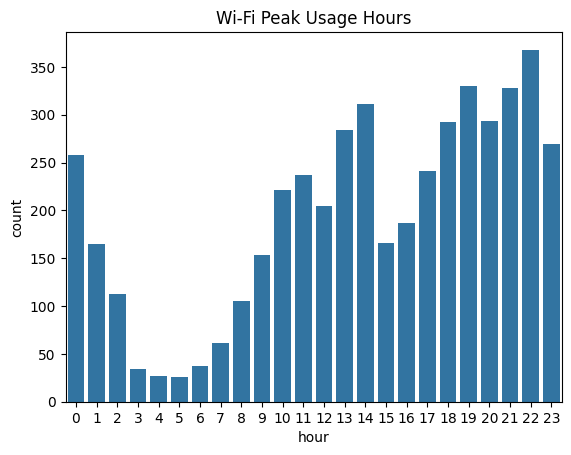

In [232]:
sns.countplot(x=df['hour'])
plt.title("Wi-Fi Peak Usage Hours")
plt.show()

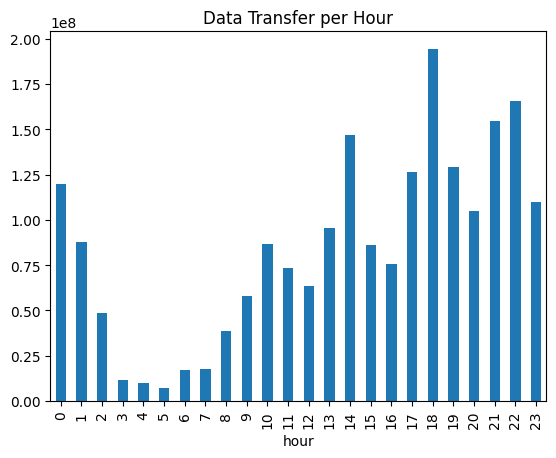

In [233]:
df.groupby('hour')['total_transfer'].sum().plot(kind='bar')
plt.title("Data Transfer per Hour")
plt.show()

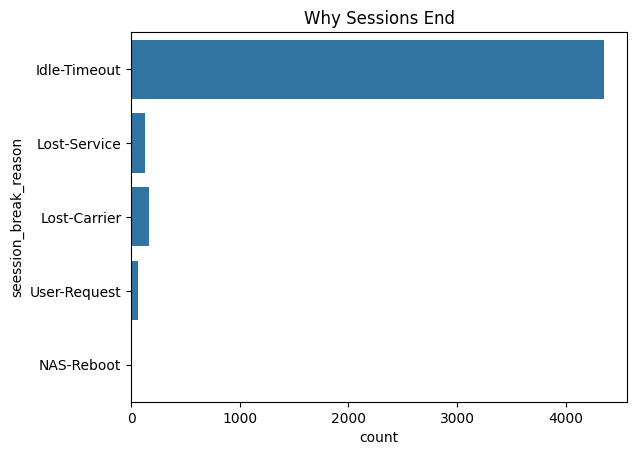

In [234]:
sns.countplot(y=df['seession_break_reason'])
plt.title("Why Sessions End")
plt.show()

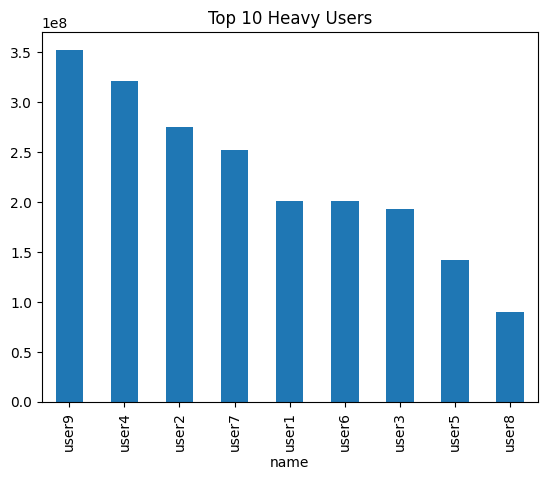

In [235]:
df.groupby('name')['total_transfer'].sum().nlargest(10).plot(kind='bar')
plt.title("Top 10 Heavy Users")
plt.show()

In [236]:
features = ["upload","download","total_transfer","hour","usage_time_in_minutes","active_users","total_data_hour"]

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   4712 non-null   object        
 1   start_time             4712 non-null   datetime64[ns]
 2   IP                     4712 non-null   object        
 3   MAC                    4712 non-null   object        
 4   upload                 4712 non-null   object        
 5   download               4712 non-null   object        
 6   total_transfer         4712 non-null   float64       
 7   seession_break_reason  4703 non-null   object        
 8   hour                   4712 non-null   int32         
 9   usage_time_in_minutes  4712 non-null   float64       
 10  load                   4712 non-null   float64       
 11  active_users           4712 non-null   int64         
 12  total_data_hour        4712 non-null   float64       
dtypes: 

In [238]:
df["upload"] = pd.to_numeric(df["upload"], errors="coerce")
df["download"] = pd.to_numeric(df["download"], errors="coerce")



In [239]:
X = np.array(df[features])
y = np.array(df["load"])

In [240]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [241]:
model = RandomForestRegressor(n_estimators=300,verbose=True)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.3s finished


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [242]:

pred = model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R²:", r2_score(y_test, pred))

MAE: 311.5137806831674
R²: 0.9135927798243034


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished


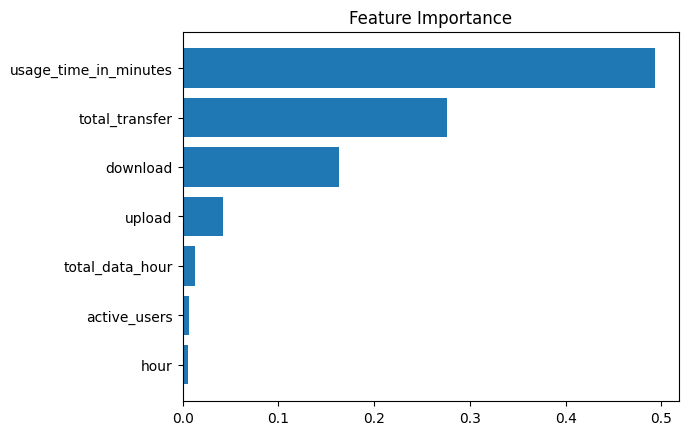

In [243]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.barh(np.array(features)[indices], importances[indices])
plt.title("Feature Importance")
plt.show()


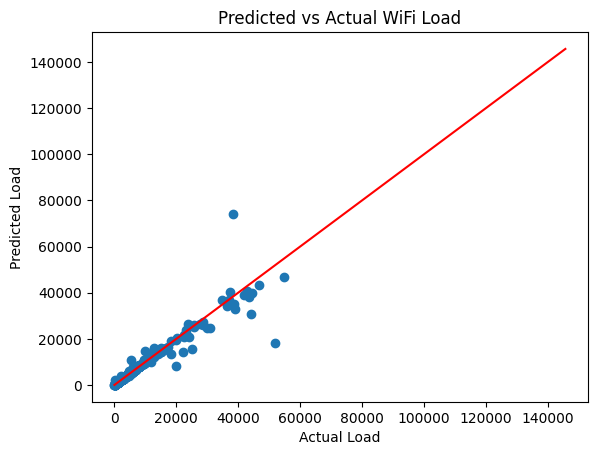

In [244]:
plt.scatter(y_test, pred)
plt.xlabel("Actual Load")
plt.ylabel("Predicted Load")
plt.title("Predicted vs Actual WiFi Load")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r')
plt.show()


In [245]:
df['predicted_load'] = model.predict(df[features])

hour_wise = df.groupby('hour')['predicted_load'].sum()

print("Slowest WiFi Hour:", hour_wise.idxmax())
print("Fastest WiFi Hour:", hour_wise.idxmin())

/Users/pashantraj/Desktop/Repos/GDSC_INDUCTION/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Slowest WiFi Hour: 18
Fastest WiFi Hour: 5


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
